# Results from pre-runned experiments.

The name printed indicates the parameters used in the experiment. For example 'data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-39_rlabel_False' means that this was the experiment for CIFAR-100 with ResNet-20, 200 epochs of training, attack algorithm inversed (all results in the paper use inversed), augmentation list 3-1-39, and no label reconstruction (none of our experiments do this).

 Test MSE gives a measure of how different the reconstructed image is of the original
 Test PSNR gives a measure of how similar they are
 Feature MSE gives a measure of how similar the model outputs are for the reconstructed image and the original. So essentially whether they are classified the same.

In [22]:
import os

import numpy as np
import torch

from torchvision import transforms

from PIL import Image

from importlib import reload

"""
    Override torch.load to transfer tensors to the cpu by default
    because it is called by np.load but np.load does not provide this functionality.
"""
reload(torch)
tl = torch.load
load_cpu = lambda *x, **y: tl(*x, **y, map_location=torch.device('cpu'))
torch.load = load_cpu


In [23]:

def read_images(path, prefix, idxs=range(0,100)):
    for i in idxs:
        try:
            yield Image.open(path + f'/{prefix}_{i+1}.jpg')
        except FileNotFoundError:
            yield Image.new('RGB', (32,32), (256,256,256))
#             yield Image.open(path + f'/{prefix}_{1}.jpg')

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [24]:
def visualize_images(root, additional_images=False):
    modes = os.listdir(root)


    for mode in modes:
        print(mode)
        try:
            metrics = np.load(root + mode + '/metric.npy', allow_pickle=True)
            print(f"N={len(metrics)}")
            for metric_name in sorted(metrics[0].keys()):
                scores = torch.tensor(list(torch.tensor(m[metric_name]) for m in metrics))
                print(f"{metric_name} mean, std = {float(scores.mean()), float(scores.std())}")

        except FileNotFoundError:
            print("Could not find metricc.npy")

        print("Originals: ")
        imgs = read_images(root + mode, 'ori')
        grid = image_grid(list(imgs), 10, 10)
        display(grid)
        grid.save(f'report/{mode}_ORIGINALS.png')
        

        print("Reconstructions: ")
        imgs = read_images(root + mode, 'rec')
        grid = image_grid(list(imgs), 10, 10)
        display(grid)
        grid.save(f'report/{mode}_RECONSTRUCTIONS.png')
        
        if additional_images:
            print("Reconstructions, untransformed: ")
            imgs = read_images(root + mode, 'rec_untransformed')
            grid = image_grid(list(imgs), 10, 10)
            display(grid)

            print("Reconstructions, isolated: ")
            imgs = read_images(root + mode, 'rec_isolated')
            grid = image_grid(list(imgs), 10, 10)
            display(grid)
            
            print("Originals, isolated: ")
            imgs = read_images(root + mode, 'ori_isolated')
            grid = image_grid(list(imgs), 10, 10)
            display(grid)

## Default attack algorithm on F-Mnist with resnet.

data_FashionMinist_arch_ResNet20-4FashionMinist_epoch_200_optim_inversed_mode_aug_auglist_19-15-45+2-43-21_rlabel_False
N=100
feat_mse mean, std = (0.4082982540130615, 0.28363916277885437)
test_mse mean, std = (0.13681566715240479, 0.047152355313301086)
test_psnr mean, std = (8.939493179321289, 1.7212040424346924)
Originals: 


<ipython-input-24-9f083ece86af>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(list(torch.tensor(m[metric_name]) for m in metrics))


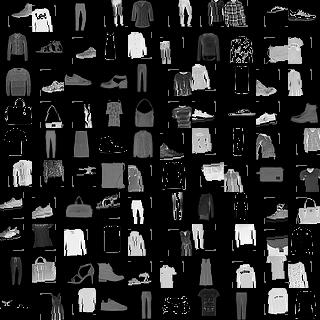

Reconstructions: 


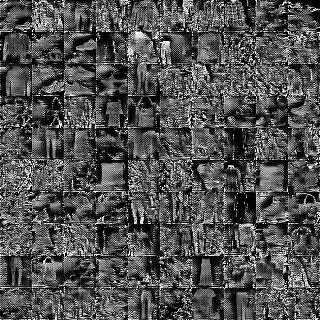

data_FashionMinist_arch_ResNet20-4FashionMinist_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False
N=100
feat_mse mean, std = (0.4290837049484253, 0.43803319334983826)
test_mse mean, std = (0.12080396711826324, 0.05200472101569176)
test_psnr mean, std = (9.70907974243164, 2.3923895359039307)
Originals: 


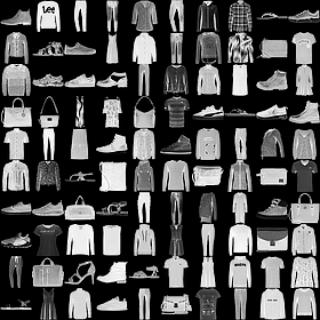

Reconstructions: 


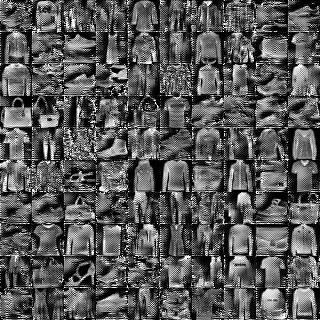

data_FashionMinist_arch_ResNet20-4FashionMinist_epoch_200_optim_inversed_mode_aug_auglist_2-43-21_rlabel_False
N=100
feat_mse mean, std = (0.45567071437835693, 0.3717610836029053)
test_mse mean, std = (0.1670517921447754, 0.04322846606373787)
test_psnr mean, std = (7.943742752075195, 1.3089492321014404)
Originals: 


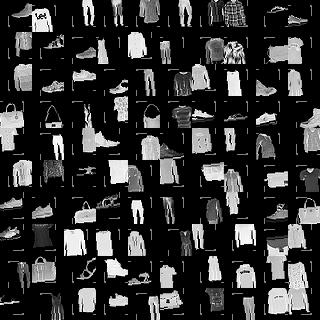

Reconstructions: 


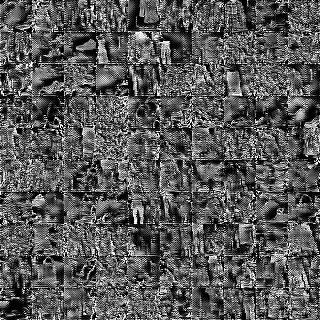

data_FashionMinist_arch_ResNet20-4FashionMinist_epoch_200_optim_inversed_mode_aug_auglist_19-15-45_rlabel_False
N=100
feat_mse mean, std = (0.3763718008995056, 0.3144456446170807)
test_mse mean, std = (0.111021488904953, 0.04073694348335266)
test_psnr mean, std = (9.880729675292969, 1.8133238554000854)
Originals: 


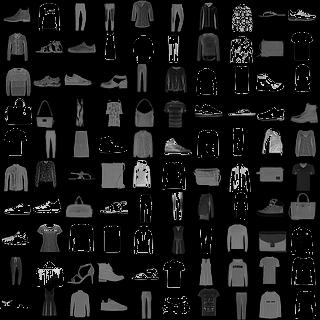

Reconstructions: 


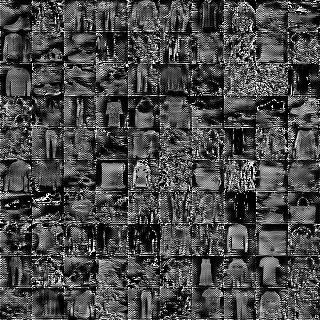

In [25]:
visualize_images('ATSDatasets/benchmark/images/')

# Re-running experiments


## Full reproduction, takes days of computation, run these in bash shell
Takes more than a day of computation

In [26]:
# python train_tinymodel_mnist.py
# download a tiny_data trained network for search 
# python -u searchalg/batch_generate.py  --arch=ResNet20-4FashionMinist --data=FashionMinist > batch_generate.sh
# bash batch_generate.sh
# python -u searchalg/search_best.py --arch=ResNet20-4FashionMinist --data=FashionMinist
# bash benchmark/run/benchmark_attack.sh